# TP Python : Redressement d’images

In [1]:
#Chargement des biliothèques utilisées
import numpy as np
import matplotlib.pyplot as plt

## 4.1 Création des matrices utilisées

### Exercice 4.1.
Créer une fonction `point_vecteur(p)` qui prend en entrée un point $p$ de coordonnées $(x, y)$ et retourne le vecteur $\begin{bmatrix} x \\y \\ 1\end{bmatrix}$ 

In [2]:
# Prend les coordonées du point p (x,y) et retourne un vecteur
def point_vecteur(p):
    return np.array([[p[0]], [p[1]], [1]])

In [3]:
# Test de la fonction point_vecteur
point_vecteur([1,2])

array([[1],
       [2],
       [1]])

### Exercice 4.2.
Créer une fonction `repere_projectif(p_1,p_2,p_3,p_4)` qui prend en entrée 4 points $p_i = ( x_i , y_i )$ de $R^2$ et retourne un booléen selon que les 4 points forment un repère projectif ou non.

In [4]:
def to_matrice (p_1,p_2,p_3):
    pv = [
                point_vecteur(p_1),
                point_vecteur(p_2),
                point_vecteur(p_3)
    ]
    arr = [[0 for i in range(3)] for i in range(3)]
    for i in range(3):
        for j in range(3):
            arr[i][j] = pv[j][i][0]
    return np.array(arr)

In [5]:
# Dis si un repère est repère projectif ou non
def repere_projectif(p_1,p_2,p_3,p_4):
    vals = [
        np.linalg.det(to_matrice(p_1,p_2,p_3)),
        np.linalg.det(to_matrice(p_1,p_2,p_4)),
        np.linalg.det(to_matrice(p_1,p_2,p_4)),
        np.linalg.det(to_matrice(p_1,p_3,p_4)),
        np.linalg.det(to_matrice(p_2,p_3,p_4))
    ]
    for i in vals:
        if i == 0:
            return False
    return True

In [6]:
# Test de la fonction repere_projectif

p_1 = [0,0]
p_2 = [1,0]
p_3 = [0,1]
p_4 = [1,1]

repere_projectif(p_1,p_2,p_3,p_4)

True

### Exercice 4.3.

Créer une fonction `matrice_A(p_1,p_2,p_3,p_4)` qui prend en entrée 4 points
$p_i = (x_i , y_i )$ de $R^2$ et retourne la matrice A de la Section 2.6.

In [7]:
def matrice_A(p_1,p_2,p_3,p_4):
    pv = [
                point_vecteur(p_1),
                point_vecteur(p_2),
                point_vecteur(p_3),
                point_vecteur(p_4)
    ]
    arr = [[0 for i in range(3)] for i in range(3)]
    for i in range(3):
        for j in range(3):
            arr[i][j] = pv[j][i][0]
    return np.array(arr)

In [8]:
# Test de la fonction matrice_A

p_1 = [0,0]
p_2 = [1,0]
p_3 = [0,1]
p_4 = [1,1]

matrice_A(p_1,p_2,p_3,p_4)

array([[0, 1, 0],
       [0, 0, 1],
       [1, 1, 1]])

### Exercice 4.4. 

Créer une fonction `matrice_B(p_1,p_2,p_3,p_4)` qui prend en entrée 4 points
$p_i = (x_i , y_i )$ de $R^2$ et retourne la matrice B de la Section 2.6

In [9]:
def matrice_B(p_1,p_2,p_3,p_4):
    if not repere_projectif(p_1,p_2,p_3,p_4):
        return print("Erreur : Cette matrice n'est pas un plan projectif")
    a = matrice_A(p_1,p_2,p_3,p_4)
    return np.linalg.inv(a)

In [10]:
# Test de la fonction matrice_B

p_1 = [0,0]
p_2 = [1,0]
p_3 = [0,1]
p_4 = [1,1]

matrice_B(p_1,p_2,p_3,p_4)

array([[-1., -1.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

### Exercice 4.5.

Créer une fonction `matrice_C(p_1,p_2,p_3,p_4)` qui prend en entrée 4 points
$p_i = (x_i , y_i )$ de $R^2$ et retourne la matrice C de la Section 2.6

In [11]:
def matrice_C(p_1,p_2,p_3,p_4):
    b = matrice_B(p_1,p_2,p_3,p_4)
    lambdas = np.dot(b,point_vecteur(p_4))
    mat_lambdas = np.array([
        [lambdas[0][0], 0, 0],
        [0, lambdas[1][0], 0],
        [0, 0, lambdas[2][0]]
    ])
    return np.dot(matrice_A(p_1,p_2,p_3,p_4), mat_lambdas)

In [12]:
p_1 = [0,0]
p_2 = [1,0]
p_3 = [0,1]
p_4 = [1,1]

matrice_C(p_1,p_2,p_3,p_4)

array([[ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [-1.,  1.,  1.]])

### Exercice 4.6.

Créer une fonction `matrice_passage(p_1,p_2,p_3,p_4,v_1,v_2,v_3,v_4)`
qui en prend en entrée 2 quadruplets de points, vérifie qu’ils forment des repères projectifs, si oui
retourne la matrice P de la Section et sinon lève une erreur avec une commande du type

In [13]:
def matrice_passage(p_1,p_2,p_3,p_4,v_1,v_2,v_3,v_4):
    cinv = np.linalg.inv(matrice_C(p_1,p_2,p_3,p_4))
    c_ = matrice_C(v_1,v_2,v_3,v_4)
    return np.dot(c_,cinv)

In [14]:
p_1 = [0,0]
p_2 = [1,0]
p_3 = [0,1]
p_4 = [1,1]

v_1 = [0,0]
v_2 = [3,1]
v_3 = [2,1]
v_4 = [5,3/2]

matrice_passage(p_1,p_2,p_3,p_4,v_1,v_2,v_3,v_4)

array([[ 6. , -1. ,  0. ],
       [ 2. , -0.5,  0. ],
       [ 1.5, -1. ,  0.5]])

### Exercice 4.7. 

Créer une fonction rectification_projective_A4(p_1,p_2,p_3,p_4,image) qui prend en entrée 4 points $(p_1 , p_2 , p_3 , p_4 )$ d’une image (préalablement importée avec une commande du type image = plt.imread("image.jpg") et retourne une image au format A4 où le quadrilatère de sommets $p_1 , p_2 , p_3 , p_4$ a été redressé sur la nouvelle image au format A4. Pour cela on suivra les instructions suivantes :

1. On créera une nouvelle image noire pour commencer de taille 594*420 pixels (un A4,
c’est 29,7 cm par 21 cm, on mutliplie ces nombres par 20) avec une commande du type
`nouvelle_image=np.zeros((594,420, 3), dtype = np.uint8)`

In [15]:
nouvelle_image=np.zeros((594,420, 3), dtype = np.uint8)

2. Quelles sont les coordonnées des 4 coins de la nouvelle image 

In [16]:
hauteur, largeur, _  = nouvelle_image.shape

print("p1 : " + str(0) + "," + str(0))
print("p2 : " + str(hauteur) + "," + str(0))
print("p3 : " + str(0) + "," + str(largeur))
print("p4 : " + str(hauteur) + "," + str(largeur))

p1 : 0,0
p2 : 594,0
p3 : 0,420
p4 : 594,420


3. Les points p 1 , p2 , p3 et p 4 seront envoyés sur ces 4 coins. **Il faudra bien faire attention à l’ordre !**

In [17]:
p_1 = [0,0]
p_2 = [hauteur, 0]
p_3 = [0, largeur]
p_4 = [hauteur,largeur]

4. Pour remplir les pixels de la nouvelle image, on fera une boucle qui parcourt tous les pixels de la nouvelle image. On appliquera la fonction $g^{-1}$ de la Section 2.6 et on récupèrera les niveaux de couleurs de l’image initiale comme on a pu le faire dans le premier TP.

5. Tester votre code sur le fichier ds.jpg qui se trouve sur Moodle. Les 4 coins sont aux coordonnées suivantes : (539,37),(2718,1285),(120,1428),(1520,2919) si on suit l’ordre hat gauche, bas gauche, haut droit, bas droit.

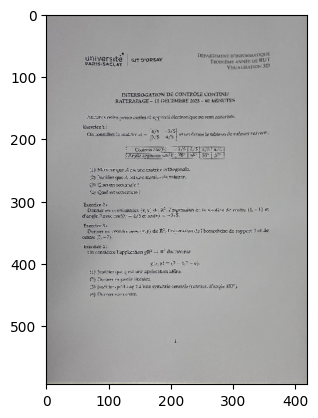

In [18]:
v_1 = [539,37]
v_2 = [2718,1285]
v_3 = [120,1428]
v_4 = [1520,2919]

# On fait v_i vers p_i car on fait g-1
p = matrice_passage(v_1,v_2,v_3,v_4,p_1,p_2,p_3,p_4)

ds = plt.imread("ds.jpg")
h, l, _ = ds.shape

for i in range(h):
    for j in range(l):
        n_p = np.dot(p,point_vecteur([i,j]))
        x = n_p[0][0] / n_p[2][0]
        y = n_p[1][0] / n_p[2][0]
        if x < hauteur and x >= 0 and y < largeur and y >= 0:
            nouvelle_image[int(x)][int(y)] = ds[i][j]

plt.imshow(nouvelle_image)

### Exercice 4.8 (anamorphose des ambassadeurs).
Observer la photographie du tableau "les ambassadeurs" du peintre Holbein qui se trouve dans le dossier du TP sur Moodle. Que voyez-vous au pied des deux ambassadeurs ? Lorsque l’on regarde le vrai tableau sous un certain angle, on voit clairement apparaitre la nature de cette forme. Nous allons utiliser nos outils de changement de perspective pour obtenir le même eet. On parle d’anamorphose. Reprendre votre code de l’Exercice 4.7 pour créer cette anamorphose en suivant les consignes suivantes 

In [19]:
nouvelle_image=np.zeros((1420,350,3), dtype = np.uint8)

In [20]:
hauteur, largeur, _  = nouvelle_image.shape

p_1 = [0,0]
p_2 = [hauteur, 0]
p_3 = [0, largeur]
p_4 = [hauteur,largeur]

print("p1 : " + str(0) + "," + str(0))
print("p2 : " + str(hauteur) + "," + str(0))
print("p3 : " + str(0) + "," + str(largeur))
print("p4 : " + str(hauteur) + "," + str(largeur))

p1 : 0,0
p2 : 1420,0
p3 : 0,350
p4 : 1420,350


In [21]:
v_1 = [5,5]
v_2 = [947,77]
v_3 = [469,268]
v_4 = [1413,342]

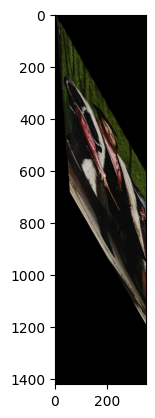

In [22]:
# On fait v_i vers p_i car on fait g-1
p = matrice_passage(p_1,p_2,p_3,p_4,v_1,v_2,v_3,v_4)

ambassadeurs = plt.imread("ambassadeurs.jpg")
h, l, _ = ambassadeurs.shape

for i in range(h):
    for j in range(l):
        n_p = np.dot(p,point_vecteur([i,j]))
        x = n_p[0][0] / n_p[2][0]
        y = n_p[1][0] / n_p[2][0]
        if x < hauteur and x >= 0 and y < largeur and y >= 0:
            nouvelle_image[int(x)][int(y)] = ambassadeurs[i][j]

plt.imshow(nouvelle_image)

### BONUS ! Créer un algo qui récupère automatiquement les point et affiche l'image sur le bon repère projectif !

Développement et test de l'algoryhtme. Ensuite je l'ai utilisé pour répodres aux questions des exercices **4.9** et **4.10**

In [23]:
def rectification_projective_A4(v_1,v_2,v_3,v_4,image):
    nouvelle_image = np.zeros((850,1450, 3), dtype = np.uint8)
    # On récupére les 4 coin de la nouvelle image
    hauteur, largeur, _  = nouvelle_image.shape
    p_1 = [0,0]
    p_2 = [hauteur, 0]
    p_3 = [0, largeur]
    p_4 = [hauteur,largeur]
    # Calcul de la matrice de passsage
    p = matrice_passage(v_1,v_2,v_3,v_4,p_1,p_2,p_3,p_4)
    # re orgnaisation des points
    h, l, _ = image.shape
    for i in range(h):
        for j in range(l):
            n_p = np.dot(p,point_vecteur([i,j]))
            x = n_p[0][0] / n_p[2][0]
            y = n_p[1][0] / n_p[2][0]
            if x < hauteur and x >= 0 and y < largeur and y >= 0:
                nouvelle_image[int(x)][int(y)] = image[i][j]
    # On retourne la nouvelle image
    return nouvelle_image

# README

On va changer l'image d'entrée ici pour pouvoir répondres au questions des exos **4.9** et **4.10** !!

In [24]:
%matplotlib qt
import matplotlib.pyplot as plt

# ICI D'abord on test avec l'image du DS !

# Exercice 4.9 avec l'image : perso.jpg
# Exerice 4.10 avec l'image tableau.jog
image = plt.imread("ds.jpg") # à modifier à votre guise

# Affichage de l'image
plt.imshow(image)

# Initialisitaion de l'index à zero
index = 0

# Création d'un vecteur vide qui va contenir les points du nouveau repère projectif
v_vects = [
    [-1, -1],
    [-1, -1],
    [-1, -1],
    [-1, -1],
]

# Fonction qui récupèr les clics sur l'image et execute la fonction lorsque que 4 points ont été attribuer !
def on_click(event):
    # On récupère les variables globales
    global index
    global v_vects
    global image
    # Si on fait un clique gauche sur l'image
    if event.button is plt.MouseButton.LEFT:
        # Si on as déaj attribuer tout les points on ne fait rien
        if index > 3:
            return
        # On attribue les points à l'index associé
        v_vects[index][1] = event.xdata
        v_vects[index][0] = event.ydata
        # On ajoute 1 à l'index
        index = index + 1
        # Si tout les points on été attribuer on affiche la nouvelle image
        if index > 3:
            print("Tout est bon on lance la fonction !!")
            print("Points choisis : ")
            print(np.array(v_vects))
            # Création de la nouvelle image
            nouvelle_image = rectification_projective_A4(v_vects[0],v_vects[1],v_vects[2],v_vects[3],image)
            plt.figure()
            plt.imshow(nouvelle_image)
            print("IMAGE SHOW !!") # Permet de savoir quand l'image à été charger (deboggage)

# Ajout de la fonction onclick à PLT pour la gestion d'évenement de clique de souris
plt.connect('button_press_event', on_click)

plt.show()

Tout est bon on lance la fonction !!
Points choisis : 
[[1319.20322646  524.586597  ]
 [2685.50294237  422.02851055]
 [ 853.45900974 2901.68557224]
 [3100.01567573 2853.23158482]]
IMAGE SHOW !!


### Réponse Exercice 4.10

Je n'arrive pas très bien à lire c'est un peu près écris : **Le Lonaor de ketchup**

Point choisi pour voir l'image :

```
v1 = [ 711.69413111 1293.3491155 ]
v2 = [2129.86062435 1433.70603538]
v3 = [ 942.30079084 2041.22008325]
v4 = [1532.04896982 2082.32414152]
```

In [25]:
# Affichage de l'image de résultat

image = plt.imread("res_tableau.png")
plt.figure()
plt.imshow(image)

### Réponse Exercice 4.9

Pour cette exo j'ai pris une photo de mon ordinateur sur le côté pour ensuite le redresser.

Je vous laisse voir le résultat ci dessous.

Point choisi pour voir l'image : 

```
v1 = [1299.30418019  524.11099838]
v2 = [2664.23417208  390.86728896]
v3 = [795.07452313 2933.11312906]
v4 = [3114.24558644 2883.23234578]
```

In [26]:
# Affichage de l'image de résultat

image = plt.imread("res_perso.png")
plt.figure()
plt.imshow(image)

Voila c'est tout pour moi merci d'avoir lu ! B)